In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
Seattle_Crime_Data = pd.read_csv('Crime_Data.csv')

In [144]:
Seattle_Crime_Call_Data = pd.read_csv('Call_Data.csv')

In [4]:
Seattle_Crime_Data.head(4)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
Seattle_Crime_Data['Occurred Date'] = pd.to_datetime(Seattle_Crime_Data['Occurred Date'],format="%m/%d/%Y")
Seattle_Crime_Data['Reported Date'] = pd.to_datetime(Seattle_Crime_Data['Reported Date'], format="%m/%d/%Y")
Seattle_Crime_Data['Time To Report'] = Seattle_Crime_Data['Reported Date'] - Seattle_Crime_Data['Occurred Date']

In [6]:
Seattle_Crime_Data['Primary Offense Description'].unique()

array(['DUI-LIQUOR', 'CHILD-OTHER', 'SEXOFF-OTHER', 'BURGLARY-FORCE-RES',
       'SEXOFF-INDECENT LIBERTIES', 'SEXOFF-SODOMY', 'THEFT-CARPROWL',
       'HOMICIDE-PREMEDITATED-WEAPON', 'VEH-THEFT-AUTO',
       'CHILD-ABUSED-NOFORCE', 'THEFT-OTH', 'RAPE-WEAPON',
       'RAPE-STRONGARM', 'HOMICIDE-PREMEDITATED-GUN',
       'HUMAN-TRAFFICKING-SEX', 'THEFT-BUILDING', 'BURGLARY-FORCE-NONRES',
       'ROBBERY-STREET-GUN', 'ROBBERY-STREET-BODYFORCE',
       'BURGLARY-NOFORCE-NONRES', 'THEFT-PKPOCKET', 'THEFT-AUTOACC',
       'THEFT-LICENSE PLATE', 'ASSLT-AGG-GUN', 'ASSLT-AGG-BODYFORCE',
       'BURGLARY-SECURE PARKING-RES', 'TRESPASS',
       'BURGLARY-SECURE PARKING-NONRES', 'BURGLARY-NOFORCE-RES',
       'ASSLT-AGG-DV-BODYFORCE', 'ASSLT-AGG-WEAPON', 'THEFT-SHOPLIFT',
       'DUI-DRUGS', 'VEH-THEFT-MTRCYCLE', 'NARC-POSSESS-OTHER',
       'NARC-SELL-COCAINE', 'THEFT-BICYCLE', 'ASSLT-AGG-POLICE-GUN',
       'SEXOFF-LEWD CONDUCT', 'HOMICIDE-PREMEDITATED-BODYFORCE',
       'VEH-THEFT-TRUCK', 'PRO

I'm curious how long it takes people to report a sexual offense since it is in the mews.

In [137]:
Seattle_Crime_Data.describe()

,Report Number,Occurred Time,Reported Time,Time To Report
count,4.931340e+05,493132.000000,493132.000000,493132
mean,1.641241e+13,1360.874210,1354.118250,7 days 15:56:52.061679
std,8.470987e+12,688.348697,590.346097,140 days 10:20:28.129769
min,2.008000e+08,0.000000,0.000000,0 days 00:00:00
25%,2.008000e+13,900.000000,950.000000,0 days 00:00:00
50%,2.012000e+13,1500.000000,1408.000000,0 days 00:00:00
75%,2.015000e+13,1922.000000,1818.000000,1 days 00:00:00
max,2.011000e+15,2359.000000,2359.000000,36525 days 00:00:00


That max looks like it was an entry error. We should drop these

In [151]:
Seattle_Crime_Data.sort_values(by='Time To Report', ascending=False).head(20)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Time To Report
0,20080000465209,1908-12-13,2114.0,2008-12-13,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,36525 days
1,20100000202011,1964-06-15,0.0,2010-06-15,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE,16801 days
4,20160000289384,1975-01-01,0.0,2016-08-11,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN,15198 days
7,20170000474905,1976-07-01,800.0,2017-12-27,1519.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN,15154 days
8,20180000183590,1977-01-01,0.0,2018-05-22,1328.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN,15116 days
3,20130000327785,1974-06-01,0.0,2013-09-09,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN,14345 days
2,2012000023437,1973-01-01,0.0,2012-01-25,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE,14268 days
13,20120000373012,1980-01-01,0.0,2012-10-31,513.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,F,F1,HIGH POINT,11992 days
9,20090000300201,1978-01-01,1.0,2009-08-25,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI,11559 days
11,20100000323749,1979-07-04,0.0,2010-09-15,1422.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,WEST,Q,Q3,QUEEN ANNE,11396 days


That 100 year old DUI is a entry error im going to drop it. 

In [153]:
Seattle_Crime_Data = Seattle_Crime_Data.sort_values(by='Time To Report', ascending=False)[1:]

Lets see what crimes are occuring in Seattle

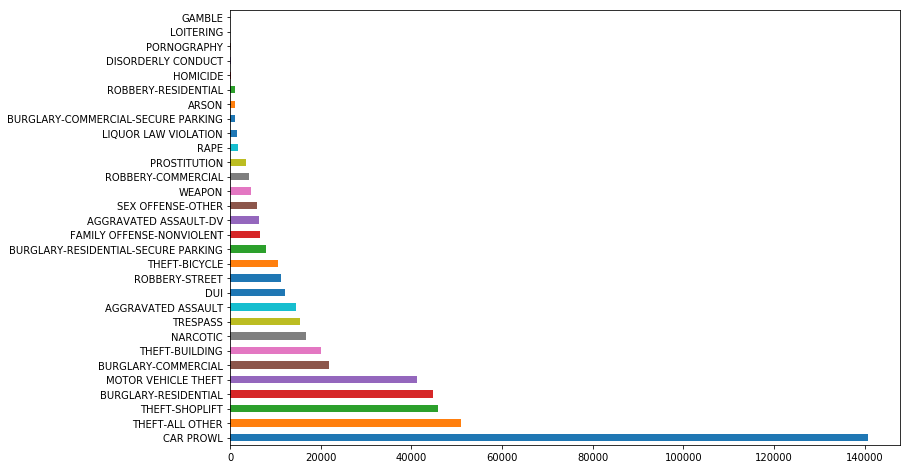

In [199]:
Seattle_Crime_Data['Crime Subcategory'].value_counts()[:40].plot(kind='barh', figsize = (12,8))


Lets see what kind of crimes take more then a year to report

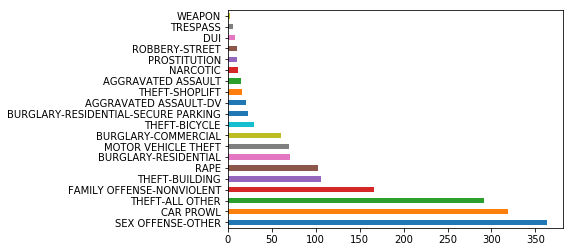

In [181]:
Seattle_Crime_Data[Seattle_Crime_Data['Time To Report'] > pd.Timedelta('365 days')]['Crime Subcategory'].value_counts()[:20].plot(kind='barh')


how about 4 years

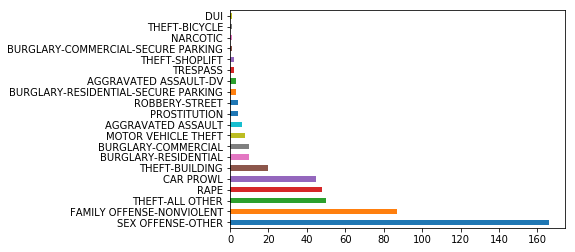

In [186]:
Seattle_Crime_Data[Seattle_Crime_Data['Time To Report'] > pd.Timedelta('1400 days')]['Crime Subcategory'].value_counts()[:20].plot(kind='barh')


SEX OFFENSE-OTHER, FAMILY OFFENSE-NONVIOLENT, RAPE are three of the top four. Seems like there are a lot of people that aren't reporting these types of crimes. THEFT-ALL OTHER could be people discovering theft on taxes but car prowls? Lets see if they are entry errors. 

In [188]:
Seattle_Crime_Data[(Seattle_Crime_Data['Time To Report'] > pd.Timedelta('1400 days'))
                   & (Seattle_Crime_Data['Crime Subcategory'] ==  'CAR PROWL')]

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Time To Report
141,20170000309788,2001-06-01,1.0,2017-08-21,1724.0,CAR PROWL,THEFT-LICENSE PLATE,EAST,G,G3,JUDKINS PARK/NORTH BEACON HILL,5925 days
63,20090000102366,1998-03-25,2100.0,2009-03-26,710.0,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q3,QUEEN ANNE,4019 days
138,20110000131353,2001-04-06,1.0,2011-04-25,1014.0,CAR PROWL,THEFT-AUTOACC,NORTH,N,N1,BALLARD NORTH,3671 days
348,20160000173399,2006-05-11,2100.0,2016-05-18,904.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,F,F3,HIGHLAND PARK,3660 days
166,20110000389222,2001-11-29,1200.0,2011-12-03,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,3656 days
300,20150000405723,2005-11-18,1630.0,2015-11-20,1347.0,CAR PROWL,THEFT-CARPROWL,NORTH,U,U3,ROOSEVELT/RAVENNA,3654 days
153,20110000265860,2001-08-12,2300.0,2011-08-13,2322.0,CAR PROWL,THEFT-CARPROWL,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,3653 days
134,2011000090879,2001-03-19,100.0,2011-03-20,938.0,CAR PROWL,THEFT-CARPROWL,SOUTH,R,R1,NORTH BEACON HILL,3653 days
135,2011000095420,2001-03-24,1530.0,2011-03-24,1603.0,CAR PROWL,THEFT-CARPROWL,WEST,M,M1,BELLTOWN,3652 days
161,20110000333160,2001-10-11,2350.0,2011-10-11,2.0,CAR PROWL,THEFT-CARPROWL,WEST,D,D2,SLU/CASCADE,3652 days


Not all but many seem to be entry errors. Might as well take a look at the Sex offense data to see if there are entry errors

In [392]:
Seattle_Crime_Data[(Seattle_Crime_Data['Time To Report'] > pd.Timedelta('1400 days'))
                   & (Seattle_Crime_Data['Crime Subcategory'] ==  'RAPE')]

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Time To Report,month
88975,20160000426678,2010-01-01,1200.0,2016-11-26,1930.0,RAPE,RAPE-STRONGARM,UNKNOWN,NaN,NaN,UNKNOWN,2521 days,2010-01
59056,2015000084599,2009-05-12,1200.0,2015-03-14,2128.0,RAPE,RAPE-STRONGARM,SOUTH,R,R1,NORTH BEACON HILL,2132 days,2009-05
93339,20150000113695,2010-02-01,1200.0,2015-04-07,1652.0,RAPE,SEXOFF-SODOMY,NORTH,U,U3,SANDPOINT,1891 days,2010-02
83631,20140000156632,2009-11-20,1300.0,2014-05-19,1630.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN,1641 days,2009-11
220134,20170000222000,2013-02-17,130.0,2017-06-20,1127.0,RAPE,RAPE-STRONGARM,NORTH,U,U1,UNIVERSITY,1584 days,2013-02
208978,20160000408534,2012-11-11,2000.0,2016-11-11,1335.0,RAPE,RAPE-STRONGARM,SOUTHWEST,F,F2,HIGHLAND PARK,1461 days,2012-11
188644,20160000192983,2012-05-16,1200.0,2016-05-16,1200.0,RAPE,RAPE-STRONGARM,UNKNOWN,NaN,NaN,UNKNOWN,1461 days,2012-05
188639,20160000192913,2012-05-16,1230.0,2016-05-16,1200.0,RAPE,RAPE-STRONGARM,UNKNOWN,NaN,NaN,UNKNOWN,1461 days,2012-05
188642,20160000192977,2012-05-16,1200.0,2016-05-16,1200.0,RAPE,RAPE-STRONGARM,UNKNOWN,NaN,NaN,UNKNOWN,1461 days,2012-05
49839,2013000057945,2009-02-19,1823.0,2013-02-19,1823.0,RAPE,RAPE-STRONGARM,SOUTH,S,S2,BRIGHTON/DUNLAP,1461 days,2009-02


These seem to be more accurate. There are a lot of car prowels and they get put into the system wrong so they show up with strange results. 

lets plot a histogram of sex crimes and see how long they take to report

In [248]:
times = Seattle_Crime_Data[Seattle_Crime_Data['Crime Subcategory'].isin(['SEX OFFENSE-OTHER','RAPE'])]['Time To Report']

In [249]:
times = times.astype('timedelta64[D]')

There is on NaN value so I drop it

In [250]:
times.dropna(inplace=True)

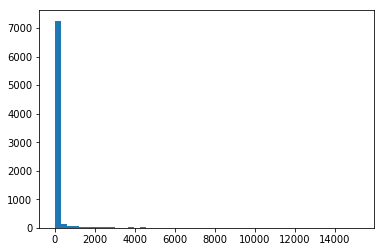

In [426]:
plt.hist(times, bins=50)
plt.show()

lets see if there is a patern in people that wait a year to report these crimes

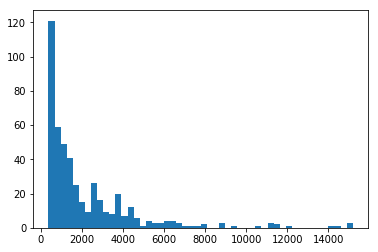

In [427]:
plt.hist(times[times > 365], bins=50)
plt.show()

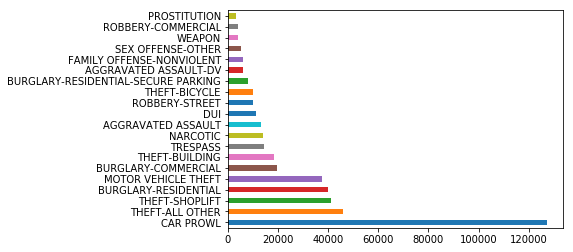

In [428]:
Seattle_Crime_Data['Crime Subcategory'].value_counts()[:20].plot(kind='barh')
plt.show()


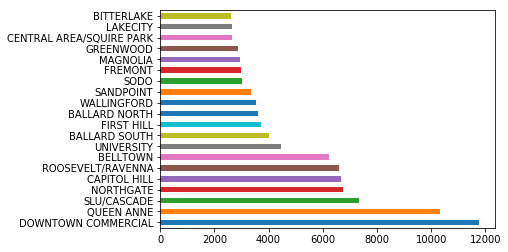

In [56]:
Seattle_Crime_Data[Seattle_Crime_Data['Crime Subcategory'] ==  'CAR PROWL']['Neighborhood'].value_counts()[:20].plot(kind='barh')

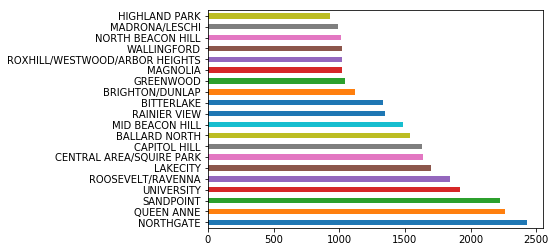

In [64]:
Seattle_Crime_Data[Seattle_Crime_Data['Crime Subcategory'] ==  'BURGLARY-RESIDENTIAL']['Neighborhood'].value_counts()[:20].plot(kind='barh')

In [341]:
Seattle_Crime_Data['month'] = Seattle_Crime_Data['Occurred Date'].dt.to_period('M')

In [387]:
Seattle_Crime_Data = Seattle_Crime_Data[Seattle_Crime_Data['month']> pd.Period('2009-01', 'M')]

In [388]:
neighborhood_data = Seattle_Crime_Data[Seattle_Crime_Data['Neighborhood'] == 'QUEEN ANNE']

In [389]:
x = neighborhood_data.groupby(['month', 'Crime Subcategory']).count()\
.reset_index().pivot(index='month', columns='Crime Subcategory', values='Report Number')

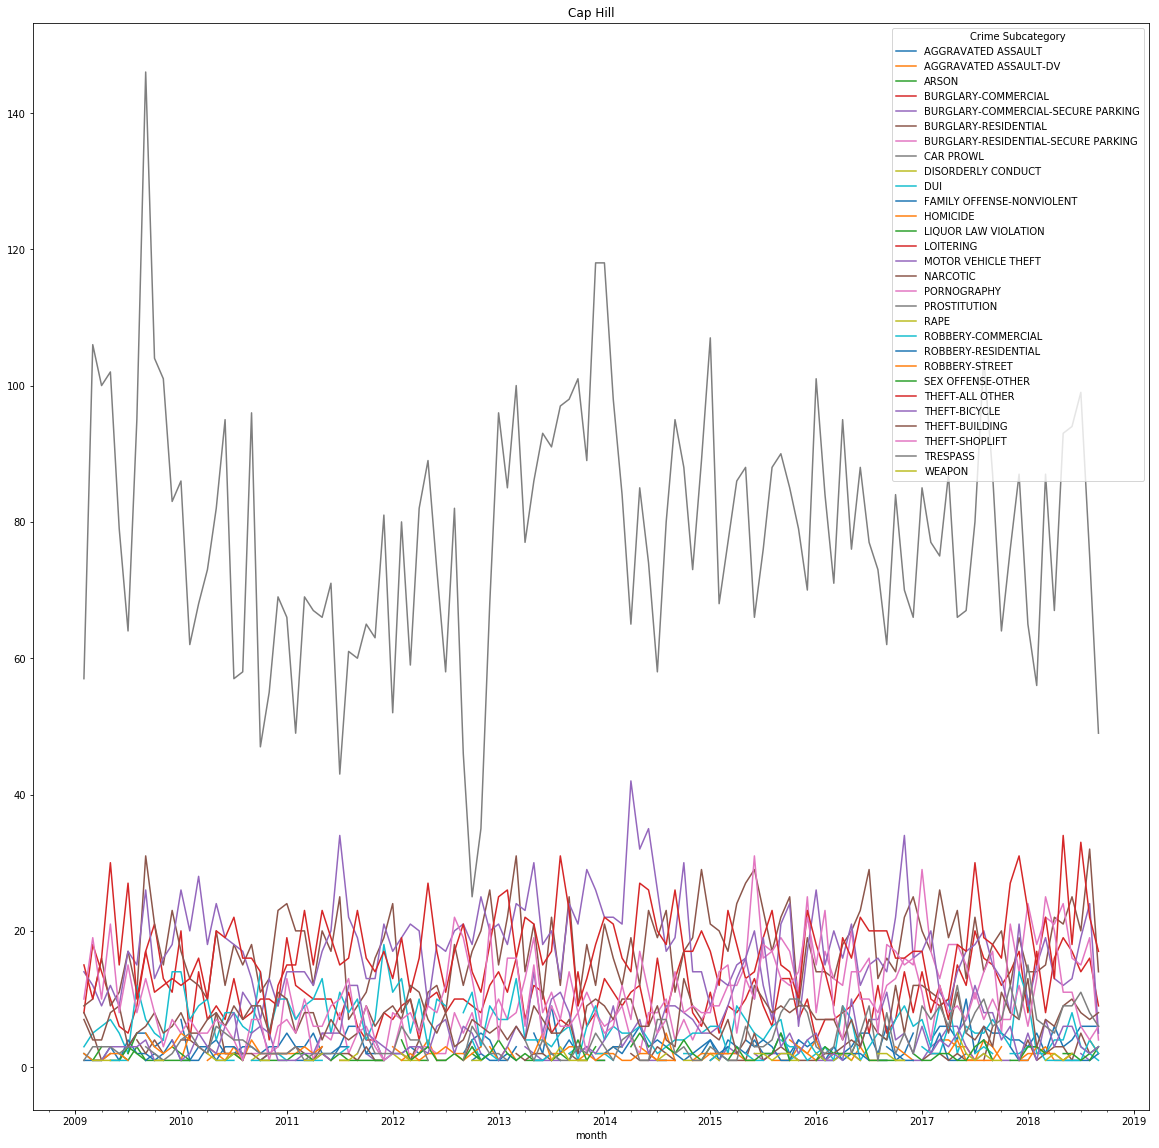

In [429]:
x.plot(figsize = (20,20), title='Cap Hill')
plt.show()

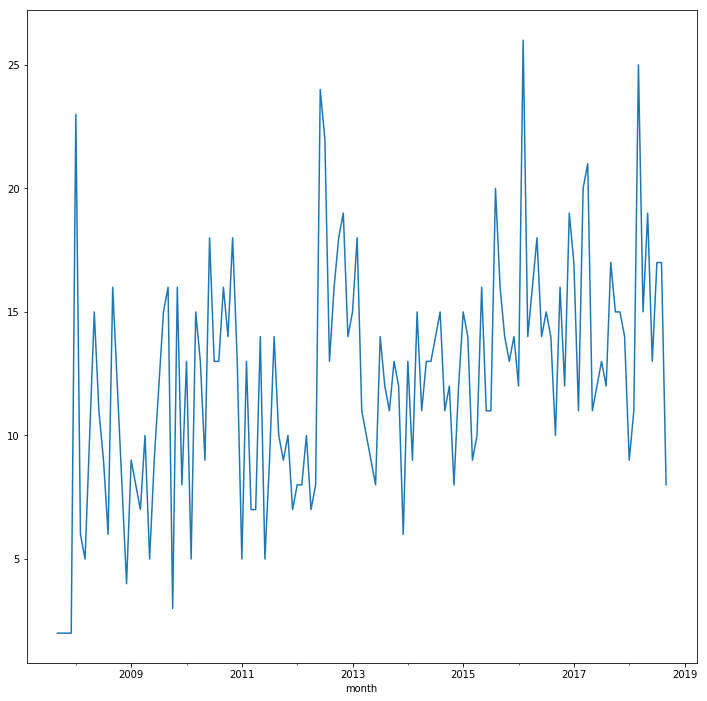

In [339]:

sdf.groupby('month')['Crime Subcategory'].count().plot.line(figsize = (12,12));


Thats prety cool lets wright a function that allows you to pick a neighborhood and crime 

In [423]:
def plot_crime_by_neighborhood(data, neighborhood, crimes):
    data['Occurred Date'] = pd.to_datetime(data['Occurred Date'],format="%m/%d/%Y")
    data['Reported Date'] = pd.to_datetime(data['Reported Date'], format="%m/%d/%Y")
    data['month'] = data['Occurred Date'].dt.to_period('M')
    data = data[data['month']> pd.Period('2009-01', 'M')]   
    data = data[data['Neighborhood'] == neighborhood]
    data = data[data['Crime Subcategory'].isin(crimes)]
    x = data.groupby(['month', 'Crime Subcategory']).count()\
                                                        .reset_index().pivot(index='month',\
                                                         columns='Crime Subcategory', values='Report Number')
    x.plot(figsize = (20,20), title=neighborhood)
    

In [14]:
def break_down_crime_neighborhood(data, neighborhood, crime):
    data['Occurred Date'] = pd.to_datetime(data['Occurred Date'],format="%m/%d/%Y")
    data['Reported Date'] = pd.to_datetime(data['Reported Date'], format="%m/%d/%Y")
    data['month'] = data['Occurred Date'].dt.to_period('M')
    data = data[data['month']> pd.Period('2009-01', 'M')]   
    data = data[data['Neighborhood'] == neighborhood]
    data = data[data['Crime Subcategory'] == crime]
    x = data.groupby(['month', 'Primary Offense Description']).count()\
                                                        .reset_index().pivot(index='month',\
                                                         columns='Primary Offense Description', values='Report Number')
    x.plot(figsize = (20,20), title=neighborhood)

In [7]:
data = pd.read_csv('Crime_Data.csv')

In [418]:
data['Neighborhood'].unique()

array(['CENTRAL AREA/SQUIRE PARK', 'QUEEN ANNE', 'NORTHGATE', 'UNKNOWN',
       'LAKEWOOD/SEWARD PARK', 'ALKI', 'HIGH POINT',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'BRIGHTON/DUNLAP', 'FIRST HILL',
       'SLU/CASCADE', 'ALASKA JUNCTION', 'SOUTH PARK', 'NORTH ADMIRAL',
       'CAPITOL HILL', 'LAKECITY', 'CLAREMONT/RAINIER VISTA',
       'ROOSEVELT/RAVENNA', 'HILLMAN CITY', 'SODO', 'SOUTH BEACON HILL',
       'HIGHLAND PARK', 'WALLINGFORD', 'FAUNTLEROY SW', 'SANDPOINT',
       'RAINIER VIEW', 'NORTH BEACON HILL', 'MORGAN', 'MAGNOLIA',
       'BITTERLAKE', 'SOUTH DELRIDGE', 'NORTH DELRIDGE', 'GREENWOOD',
       'RAINIER BEACH', 'MID BEACON HILL', 'MOUNT BAKER', 'PHINNEY RIDGE',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'BELLTOWN', 'UNIVERSITY',
       'PIONEER SQUARE', 'GENESEE', 'MILLER PARK', 'BALLARD NORTH',
       'DOWNTOWN COMMERCIAL', 'BALLARD SOUTH', 'MADRONA/LESCHI',
       'JUDKINS PARK/NORTH BEACON HILL', 'FREMONT', 'COLUMBIA CITY',
       'MONTLAKE/PORTAGE BAY', 'NEW HOLLY'

In [417]:
data['Crime Subcategory'].unique()

array(['DUI', 'FAMILY OFFENSE-NONVIOLENT', 'SEX OFFENSE-OTHER',
       'BURGLARY-RESIDENTIAL', 'RAPE', 'CAR PROWL', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'THEFT-ALL OTHER', 'PROSTITUTION',
       'THEFT-BUILDING', 'BURGLARY-COMMERCIAL', 'ROBBERY-STREET',
       'AGGRAVATED ASSAULT', 'BURGLARY-RESIDENTIAL-SECURE PARKING',
       'TRESPASS', 'BURGLARY-COMMERCIAL-SECURE PARKING',
       'AGGRAVATED ASSAULT-DV', 'THEFT-SHOPLIFT', 'NARCOTIC',
       'THEFT-BICYCLE', 'ROBBERY-RESIDENTIAL', 'ARSON', 'PORNOGRAPHY',
       'ROBBERY-COMMERCIAL', 'LIQUOR LAW VIOLATION', 'WEAPON',
       'LOITERING', nan, 'DISORDERLY CONDUCT', 'GAMBLE'], dtype=object)

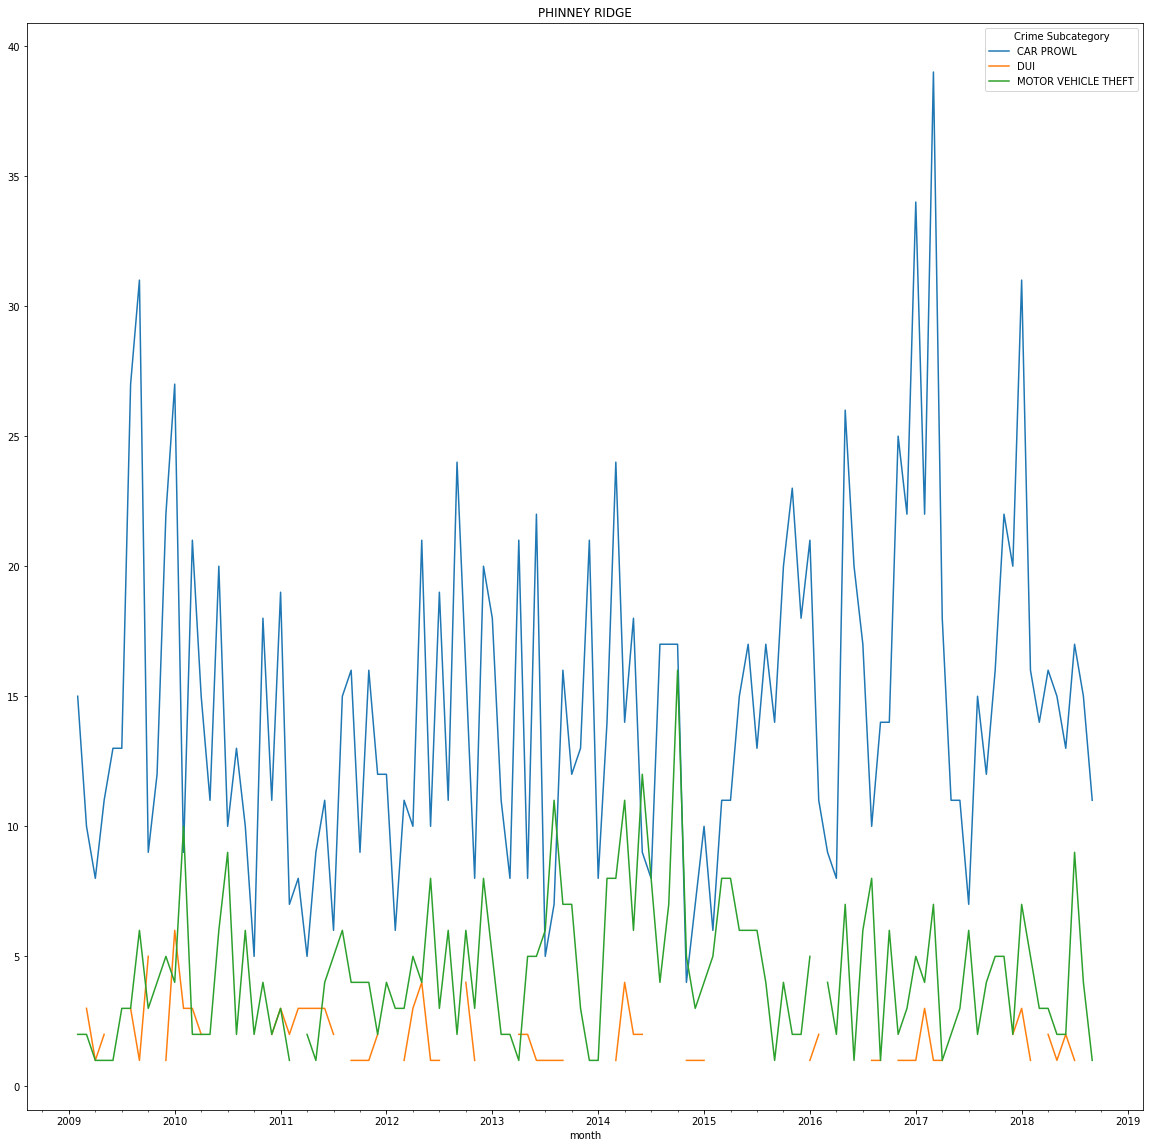

In [424]:
plot_crime_by_neghborhood(data, 'PHINNEY RIDGE', ['CAR PROWL', 'DUI', 'MOTOR VEHICLE THEFT'])

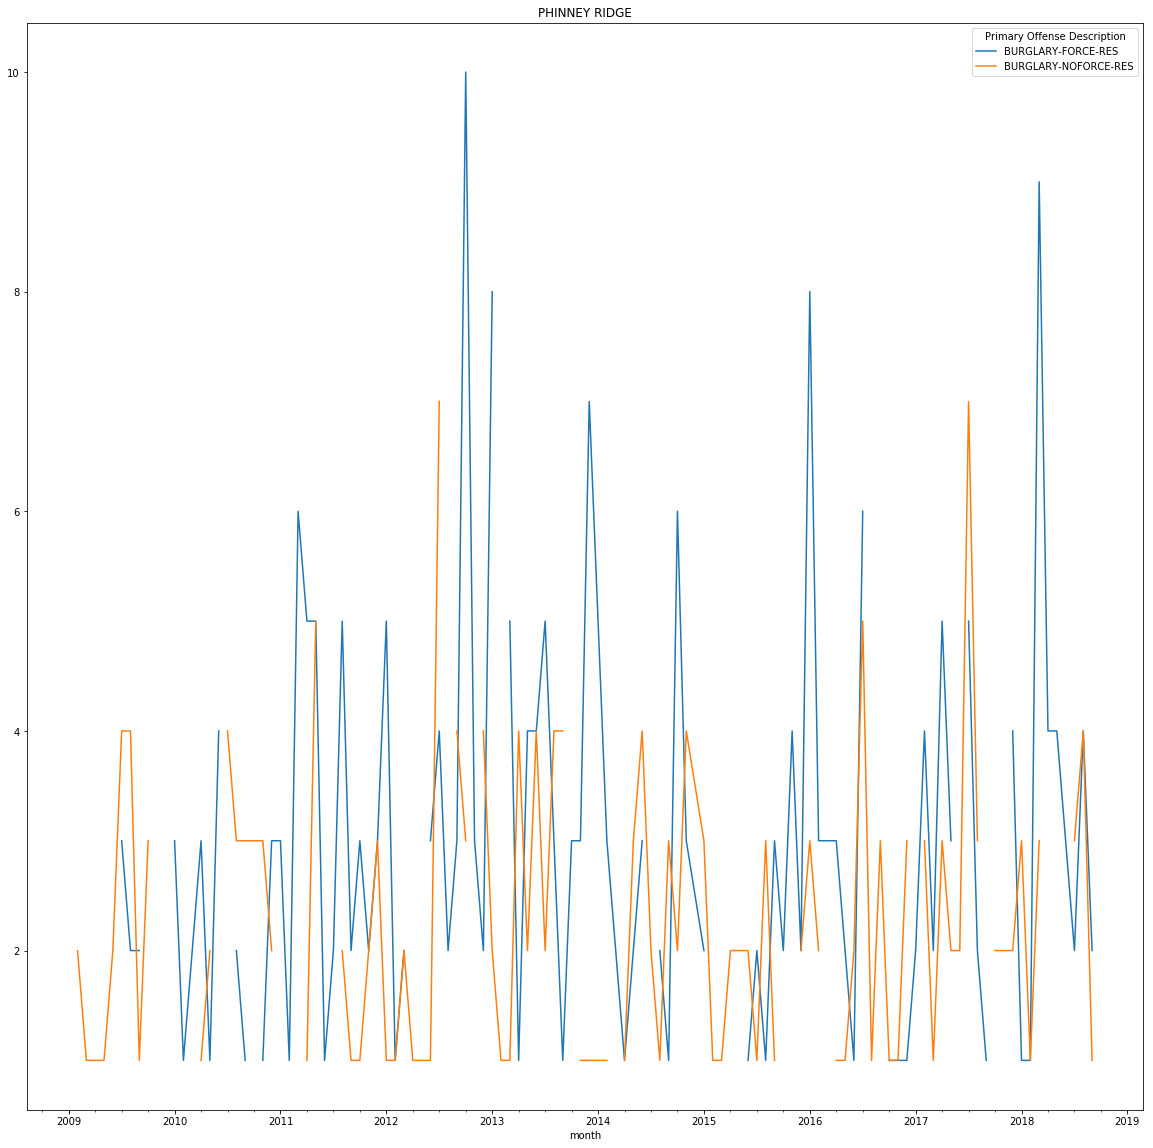

In [15]:
break_down_crime_neighborhood(data, 'PHINNEY RIDGE', 'BURGLARY-RESIDENTIAL')